### Linear Regression

**Steps involved in the model building**

1. Problem Statment /undestand requirment
2. Data collection / data gethering
3. Data precprocessing / data cleaning /data prepration(null values, convert to non numeric, etc)
4. Sampling( divide data into train and test)
5. Training ( model creation)
6. Testing( model validation)

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
lcn = pd.read_csv("LungCapData.csv") #lungcap is the target variable

In [7]:
lcn.Gender.replace({"male" :1 , "female":0} ,inplace = True)
lcn.Smoke.replace({"no" : 0 , "yes" :1} , inplace = True)
lcn.Caesarean.replace({"no" : 0 , "yes" :1} , inplace = True)

In [8]:
#seprate my X and Y
lcn_x = lcn.iloc[: , [1,2,3,4,5]]
lcn_y = lcn.iloc[: , 0]

In [9]:
#train/test split
lcn_x_train , lcn_x_test, lcn_y_train, lcn_y_test = train_test_split(lcn_x , lcn_y , test_size  = .2)

In [10]:
# object / instance / running the model for first time
reg = LinearRegression()

In [11]:
reg.fit(lcn_x_train, lcn_y_train) # model has been created 
#model is created using fit function -----> and the synatx is x, y

LinearRegression()

In [12]:
pred_train = reg.predict(lcn_x_train)
pred_test = reg.predict(lcn_x_test)

In [13]:
print("Coefficients ---->",reg.coef_)  # are the co-effiecents ( Beta Values)
print(lcn_x_train.columns) # these coeff are the 5 x variable
print("Intercept    ---->",reg.intercept_)  # Beta-not value

Coefficients ----> [ 0.17463375  0.25720706 -0.71898155  0.42660787 -0.20746565]
Index(['Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')
Intercept    ----> -11.064104639556117


In [14]:
Rsquare  = reg.score(lcn_x_train , lcn_y_train)

In [15]:
# Adjusted Rsquare 
#AdjRSquare  =  1 - (1- Rsquare) * ( N -1) /  ( N -  K  -  1)

N = lcn_x_train.shape[0]

K = lcn_x_train.shape[1]
Rsquare  = reg.score(lcn_x_train , lcn_y_train)

In [16]:
AdjRSquare  =  1 - (1- Rsquare) * ( N -1) /  ( N -  K  -  1)

print("Adjusted Rsquare is     ---- >   "  , AdjRSquare)

Adjusted Rsquare is     ---- >    0.8547733390520561


In [17]:
error_train =lcn_y_train - pred_train
print("Error    ---->",np.mean(error_train))

Error    ----> 1.554312234475219e-16


In [18]:
error_test = lcn_y_test - pred_test

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='LungCap'>

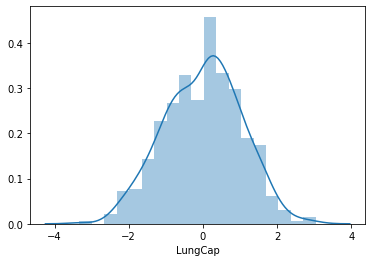

In [21]:
sns.distplot(error_train) # errors are normally distrubted 

(array([  1.,  15.,  40.,  82., 108., 143., 111.,  62.,  14.,   4.]),
 array([-3.32819649, -2.69130254, -2.05440859, -1.41751464, -0.7806207 ,
        -0.14372675,  0.4931672 ,  1.13006115,  1.76695509,  2.40384904,
         3.04074299]),
 <BarContainer object of 10 artists>)

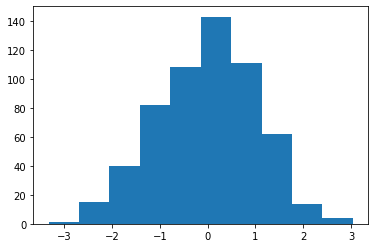

In [22]:
plt.hist(error_train)

In [23]:
MSE  = np.mean((np.square(error_test)))
print("MSE      ----> ", MSE)
RMSE = np.sqrt(MSE)
print("RMSE     ----> ", RMSE)
MAPE =  np.mean(np.abs(error_test / lcn_y_test)* 100)
print("MAPE     ----> ",MAPE)
Acc = 100 - MAPE
print("Accuracy ----> ",Acc)

MSE      ---->  0.9290008489627398
RMSE     ---->  0.9638469012051343
MAPE     ---->  10.811943840475806
Accuracy ---->  89.1880561595242
